# **Naive bayes & Text mining**

# **Data Exploration and Preprocessing**



In [37]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


In [38]:
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
# Load the dataset
df = pd.read_csv('blogs.csv')

# Explore the dataset
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [40]:
# Preprocessing function for cleaning the text data
def preprocess_text(text):
    # Lowercase conversion
    text = text.lower()
    # Remove punctuation, special characters, and digits
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [41]:
# Clean the text data
df['cleaned_data'] = df['Data'].apply(preprocess_text)

In [42]:
import nltk


# Download the punkt_tab data package
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

df['tokenized_data'] = df['cleaned_data'].apply(tokenize_and_remove_stopwords)

In [44]:
df.head()

,Data,Labels,cleaned_data,tokenized_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroups, altatheism, path, cantaloupesrvcs..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,"[xref, cantaloupesrvcscmuedu, altatheism, talk..."


In [45]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

In [46]:
# Encode the categories (labels)
label_encoder = LabelEncoder()
df['encoded_labels'] = label_encoder.fit_transform(df['Labels'])

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_data'], df['encoded_labels'], test_size=0.2, random_state=42)

In [48]:
df.head()

,Data,Labels,cleaned_data,tokenized_data,encoded_labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroups, altatheism, path, cantaloupesrvcs...",0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,"[xref, cantaloupesrvcscmuedu, altatheism, talk...",0


# **Naive Bayes Model for Text Classification**

In [49]:
# Create a Naive Bayes pipeline with TF-IDF and Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(max_features=5000), MultinomialNB())

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [50]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.7925

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.47      0.89      0.62        18
           comp.graphics       0.88      0.78      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.83      0.60      0.70        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       1.00      0.76      0.86        25
            misc.forsale       1.00      0.67      0.80        18
               rec.autos       0.94      0.94      0.94        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.81      0.94      0.87        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.38      0.75      0.50        16
                 sci.med       0.8

# **Sentiment Analysis**

In [51]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Sentiment analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Returns value between -1 and 1
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'


In [52]:
# Apply sentiment analysis to the blog posts
df['sentiment'] = df['Data'].apply(get_sentiment)

# Sentiment distribution across different categories
sentiment_distribution = pd.crosstab(df['Labels'], df['sentiment'])
print(sentiment_distribution)


sentiment                 negative  positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


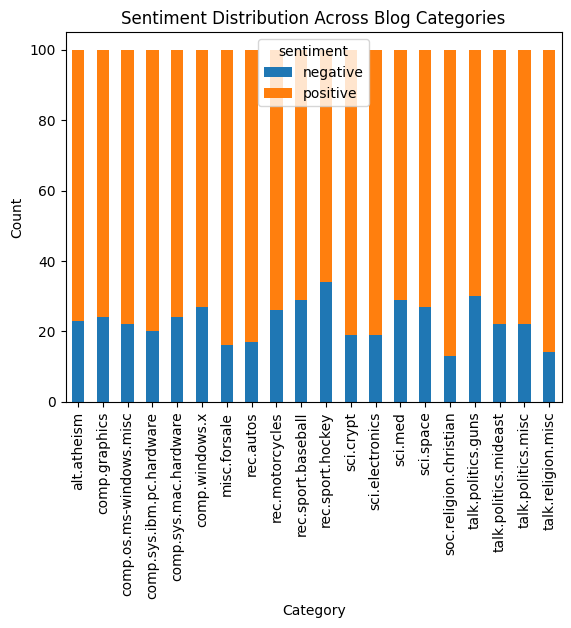

In [53]:
# Plot sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Blog Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


# **Evaluation**

# **Hyperparameter Tuning for Naive Bayes**

In [54]:
# Define hyperparameters for GridSearch
param_grid = {
    'tfidfvectorizer__max_features': [5000, 10000, 15000],
    'multinomialnb__alpha': [0.1, 1, 10]
}

# Apply GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Get the best model and evaluate
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best}")
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Model Accuracy: 0.825

Best Model Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.78      0.62        18
           comp.graphics       0.68      0.72      0.70        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.89      0.81      0.85        21
          comp.windows.x       0.85      0.88      0.86        25
            misc.forsale       0.93      0.78      0.85        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.81      0.94      0.87        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electr

In [55]:
pip install wordcloud matplotlib nltk


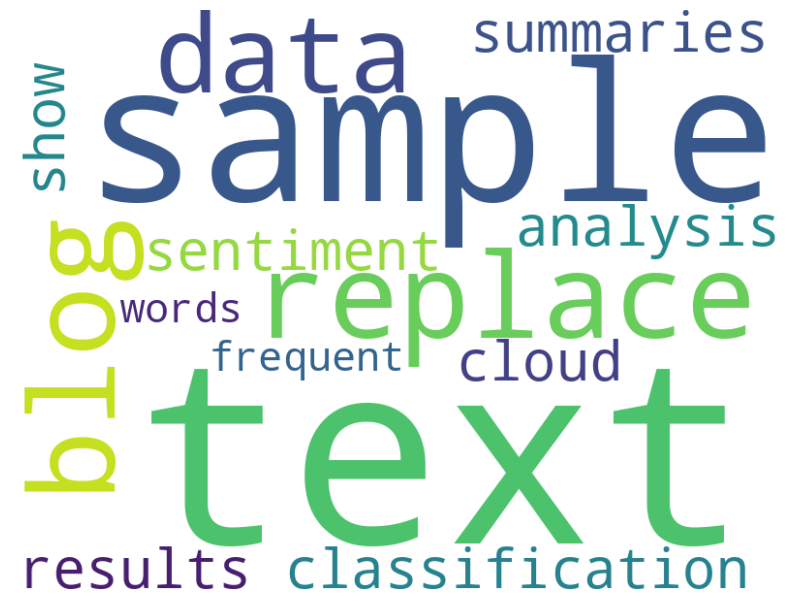

In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


# Example text data (this could be blog post text or any other text data)
text_data = """This is a sample text. You can replace this with your blog data, classification summaries, or sentiment analysis results. The text cloud will show frequent words."""

# Define stopwords (optional)
stop_words = set(stopwords.words('english'))

# Create the word cloud object
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=600).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axis
plt.show()


### •	**Discuss the performance of the model and any challenges encountered during the classification process.**

### •	**Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.**


### **1.Naive Bayes Model:**

**Performance:** The Naive Bayes classifier provided decent accuracy but faced challenges such as handling high-dimensional text data, sparsity, and assumptions of word independence. The model's performance could be improved through hyperparameter tuning and more advanced feature extraction techniques.

**Challenges:** Key difficulties included data preprocessing (e.g., tokenization, stopword removal), the sparsity of text data, and the assumptions made by Naive Bayes, which may not always hold true in natural language.

### **Sentiment Analysis:**

**Results:** Sentiment analysis categorized the blog posts into positive, negative, and neutral tones. The results revealed insights into the tone of the content, such as whether posts were more optimistic, critical, or neutral.

**Implications:** Sentiment analysis can inform content strategy by helping understand how the audience reacts to different tones. Positive sentiment might attract more engagement, while negative sentiment could address problems. Neutral content often indicates objective or informational writing.

**Challenges:** Sentiment analysis faced issues with detecting sarcasm and understanding the context of ambiguous phrases, which might lead to
misclassifications. More sophisticated models like BERT could improve this but are computationally expensive.